## Creating Efficient Frontier of Banking stocks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nsepy
import quandl
import datetime
from scipy import stats

In [3]:
start = datetime.date(year=2015, month=1, day=1)
end = datetime.date(year=2022, month=8, day=30)

In [4]:
df1 = nsepy.get_history('KOTAKBANK', start=start, end=end)
df2 = nsepy.get_history('ICICIBANK', start=start, end=end)
df3 = nsepy.get_history('HDFCBANK', start=start, end=end)
df4 = nsepy.get_history('INDUSINDBK', start=start, end=end)


### Stocks are  KOTAK,  ICICI ,  HDFC,  INDUSIND BANK


In [5]:
stocks = pd.concat([df1[['Close']], df2[['Close']],df3[['Close']],df4[['Close']]], axis=1)
stocks.columns = ['kotak', 'icici','hdfc','indusind']
print(stocks)



              kotak   icici     hdfc  indusind
Date                                          
2015-01-01  1258.60  352.30   952.05    812.00
2015-01-02  1271.55  362.30   965.30    815.90
2015-01-05  1266.45  363.05   957.15    819.10
2015-01-06  1251.35  347.65   942.25    798.40
2015-01-07  1271.50  338.25   945.00    791.95
...             ...     ...      ...       ...
2022-08-24  1867.60  873.30  1472.85   1101.90
2022-08-25  1868.75  872.35  1464.85   1089.95
2022-08-26  1902.05  870.85  1465.10   1069.75
2022-08-29  1850.00  855.85  1439.40   1059.20
2022-08-30  1915.45  887.30  1486.10   1107.45

[1898 rows x 4 columns]


### Daily returns of all instrument

In [6]:
daily_ret = stocks.pct_change(1)
daily_ret =daily_ret.dropna()
print(daily_ret)

               kotak     icici      hdfc  indusind
Date                                              
2015-01-02  0.010289  0.028385  0.013917  0.004803
2015-01-05 -0.004011  0.002070 -0.008443  0.003922
2015-01-06 -0.011923 -0.042418 -0.015567 -0.025272
2015-01-07  0.016103 -0.027039  0.002919 -0.008079
2015-01-08  0.054385  0.027199  0.021005  0.008523
...              ...       ...       ...       ...
2022-08-24  0.006386  0.010881  0.004810  0.028804
2022-08-25  0.000616 -0.001088 -0.005432 -0.010845
2022-08-26  0.017819 -0.001719  0.000171 -0.018533
2022-08-29 -0.027365 -0.017225 -0.017541 -0.009862
2022-08-30  0.035378  0.036747  0.032444  0.045553

[1897 rows x 4 columns]


### Mean returns of all instruments

In [7]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

kotak       0.000481
icici       0.000726
hdfc        0.000444
indusind    0.000528
dtype: float64

### Correlation Among all Banks

In [8]:
stocks.pct_change(1).corr()

,kotak,icici,hdfc,indusind
kotak,1.000000,0.379818,0.430918,0.367305
icici,0.379818,1.000000,0.437722,0.458208
hdfc,0.430918,0.437722,1.000000,0.406560
indusind,0.367305,0.458208,0.406560,1.000000


### Normalising prices

<AxesSubplot:xlabel='Date'>

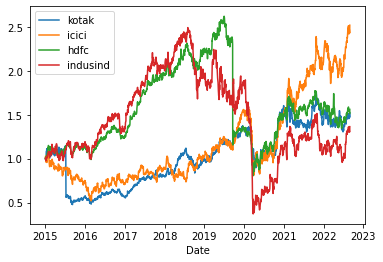

In [9]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

### Using Log returns for our calculation

In [10]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,kotak,icici,hdfc,indusind
Date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,0.010237,0.027990,0.013821,0.004791
2015-01-05,-0.004019,0.002068,-0.008479,0.003914
2015-01-06,-0.011995,-0.043344,-0.015689,-0.025596
2015-01-07,0.015974,-0.027411,0.002914,-0.008111


### Histogram for returns distribution

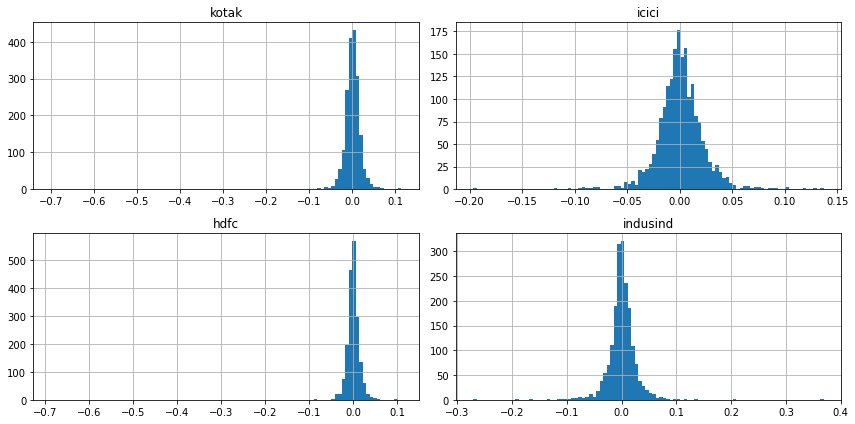

In [11]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [12]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kotak,1897.0,0.000221,0.023892,-0.701176,-0.008595,0.000690,0.009833,0.113784
icici,1897.0,0.000487,0.021863,-0.196597,-0.010725,-0.000179,0.011549,0.137042
hdfc,1897.0,0.000235,0.021632,-0.686609,-0.006497,0.000494,0.007544,0.109747
indusind,1897.0,0.000164,0.026940,-0.270858,-0.010176,-0.000082,0.011652,0.369306


### Getting expected returns by assigning random weights

In [13]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum((log_ret.mean() * weights)*252)
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['kotak', 'icici', 'hdfc', 'indusind'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.08359142952852304


Expected Volatility
0.28696503204823454


Sharpe Ratio
0.2912948275679546


### Assigning equal weights to all banks

In [19]:
for stock_df,allo in zip([df1,df2,df3,df4],[.25,.25,0.25,.25]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

KeyError: 'Normed Return'

In [ ]:
for stock_df in [df1,df2,df3,df4]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [100]:
portfolio_val = pd.concat([df1['Position Values'],df2['Position Values'],df3['Position Values'],df4['Position Values']],axis=1)

### Plotting portfolio values

In [101]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2015-01-01,250000.000000,250000.000000,250000.000000,250000.000000
2015-01-02,252572.302558,257096.224808,253479.334069,251200.738916
2015-01-05,251559.272207,257628.441669,251339.215377,252185.960591
2015-01-06,248559.907834,246700.255464,247426.605745,245812.807882
2015-01-07,252562.370888,240029.804144,248148.731684,243826.970443


In [102]:
portfolio_val.columns = ['kotak Pos','icici Pos','hdfc Pos','indusind Pos']

In [103]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

Text(0.5, 1.0, 'Total Portfolio Value')

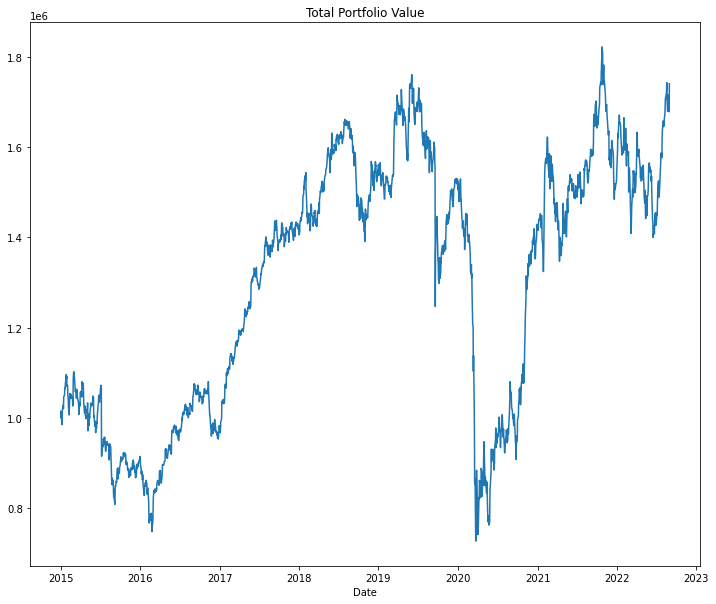

In [104]:
portfolio_val['Total Pos'].plot(figsize=(12,10))
plt.title('Total Portfolio Value')

### Portfolio values individually

<AxesSubplot:xlabel='Date'>

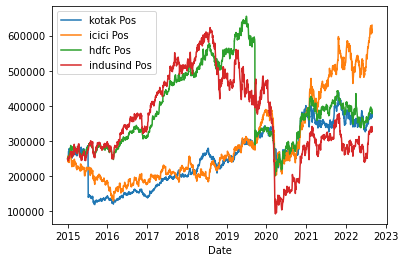

In [105]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [107]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Getting out returns calculation 

In [108]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return was {} percent!'.format(cum_ret))

Our return was 74.13209047385716 percent!


### Plotting efficient frontier 

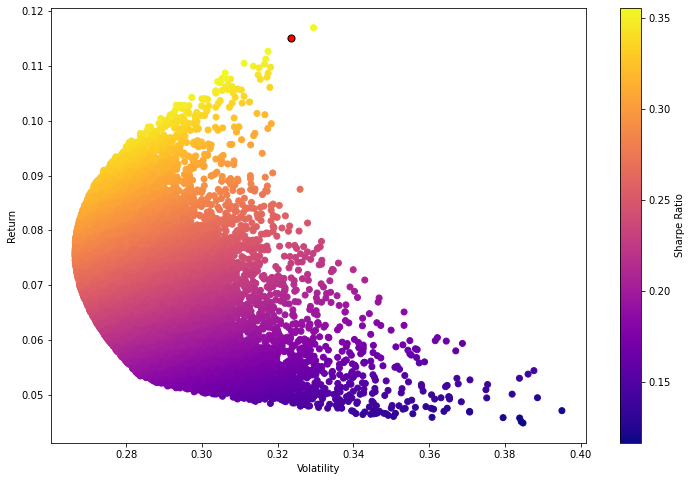

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

### The red dot indicates maximum effecient portfolio and according to Harry markowitz all investors should buy this portfolio